In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("archive/train/neutral/im0.png")

In [3]:
img_array.shape

(48, 48, 3)

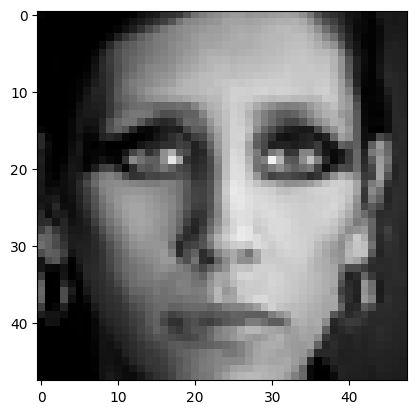

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory_train = r'C:\Users\vpachava\Desktop\DIP_Project\archive\train'
Datadirectory_test = r'C:\Users\vpachava\Desktop\DIP_Project\archive\test'

In [6]:
Classes=['angry','disgusted','fearful','happy','neutral','sad','surprised']

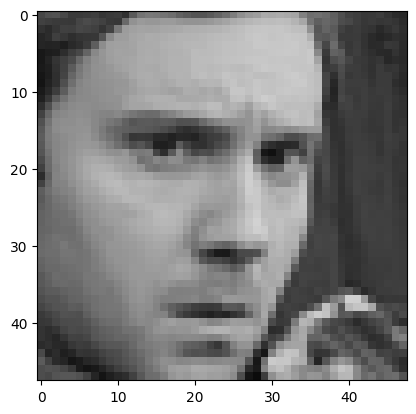

In [11]:
for category in Classes:
  path = os.path.join(Datadirectory_train, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break # break or else it will display all the images
  break #same as above

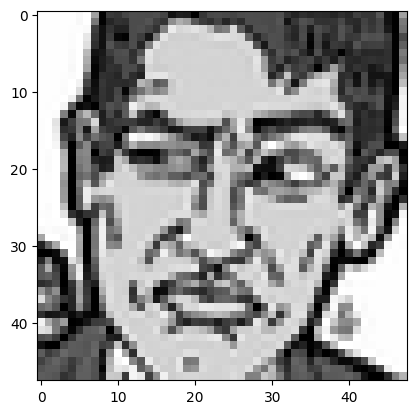

In [9]:
for category in Classes:
  path = os.path.join(Datadirectory_test, category)
  for img in os.listdir(path):
    img_array_test = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array_test, cv2.COLOR_BGR2RGB))
    plt.show()
    break # break or else it will display all the images
  break #same as above

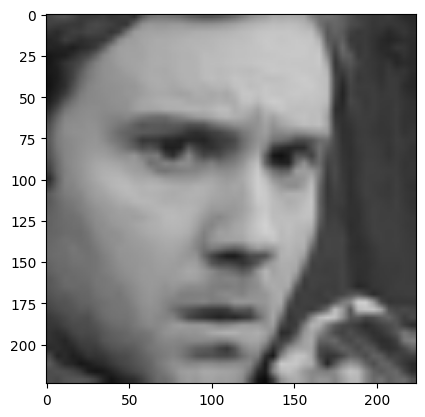

In [12]:
img_size = 224 #ImageNet
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

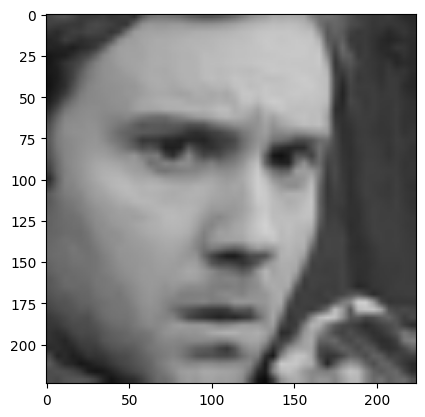

In [13]:
img_size = 224 #ImageNet
new_array_test = cv2.resize(img_array_test, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
new_array.shape #converted size to standard to use transfer learning


(224, 224, 3)

In [16]:
new_array_test.shape

(224, 224, 3)

In [17]:
# read all the images and convert them to array
training_Data = []
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory_train, category)
    class_num = Classes.index(category) # 0, 1, ... labels
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [18]:
create_training_Data()

In [19]:
print(len(training_Data))

28709


In [20]:
# read all the images and convert them to array
testing_Data = []
def create_testing_Data():
  for category in Classes:
    path = os.path.join(Datadirectory_test, category)
    class_num = Classes.index(category) # 0, 1, ... labels
    for img in os.listdir(path):
      try:
        img_array_test = cv2.imread(os.path.join(path, img))
        new_array_test = cv2.resize(img_array_test, (img_size, img_size))
        testing_Data.append([new_array_test, class_num])
      except Exception as e:
        pass

In [21]:
create_testing_Data()

In [22]:
print(len(testing_Data))

7178


In [15]:
#training_Data = training_Data[:len(training_Data)//5]

In [16]:
print(len(training_Data))

28709


In [23]:
X_train = []
y_train = []

for features, label in training_Data:
  X_train.append(features)
  y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)

In [24]:
X_train.shape

(28709, 224, 224, 3)

In [25]:
X_test = []
y_test = []

for features, label in testing_Data:
  X_test.append(features)
  y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [26]:
X_test.shape

(7178, 224, 224, 3)

In [27]:

X_train = X_train/255.0;

In [28]:
Y_train = np.array(y_train)

In [29]:
X_test=X_test/255.0;
Y_test=np.array(y_test)

In [30]:
## deep learning model - transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model = tf.keras.applications.MobileNetV2() 

In [32]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [33]:
base_input = model.layers[1].input

In [34]:
base_output = model.layers[-2].output

In [35]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [36]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [37]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [38]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [39]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [41]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
history = new_model.fit(
    X_train, Y_train,
    epochs=25,
    validation_data=(X_test, Y_test)
)


Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 669s 733ms/step - accuracy: 0.4887 - loss: 1.3559 - val_accuracy: 0.3221 - val_loss: 4.6203
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 653s 727ms/step - accuracy: 0.5999 - loss: 1.0661 - val_accuracy: 0.3416 - val_loss: 2.9449
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 653s 727ms/step - accuracy: 0.6305 - loss: 0.9900 - val_accuracy: 0.4965 - val_loss: 2.1640
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 652s 725ms/step - accuracy: 0.6525 - loss: 0.9277 - val_accuracy: 0.4259 - val_loss: 2.4298
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 655s 730ms/step - accuracy: 0.6843 - loss: 0.8578 - val_accuracy: 0.5113 - val_loss: 1.5395
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 656s 730ms/step - accuracy: 0.6993 - loss: 0.8061 - val_accuracy: 0.4076 - val_loss: 2.4326
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 654s 729ms/step - accuracy: 0.7222 - loss: 0.7639 - val_accuracy: 0.4767 - val_loss: 1.8189
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 652s 726ms/step - accuracy: 0.7410 -

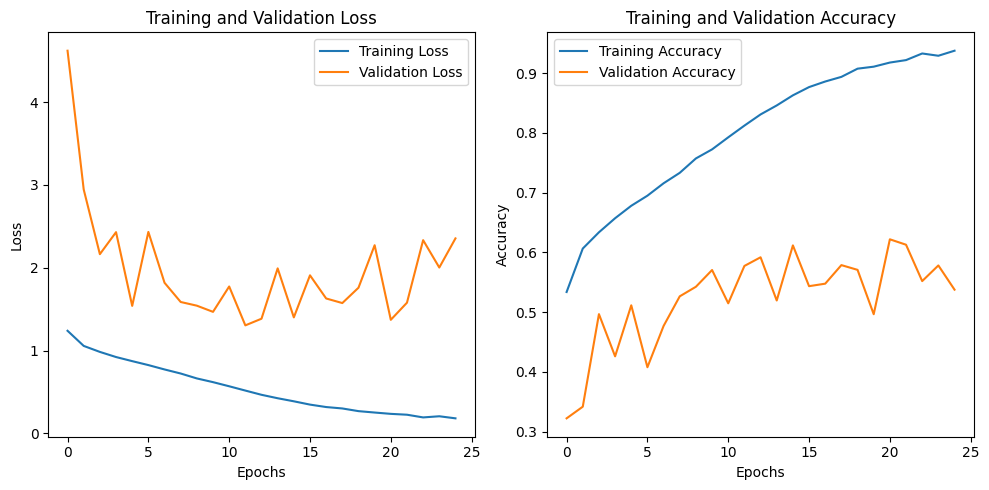

In [46]:
import matplotlib.pyplot as plt

# Extracting the data from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
try:
    train_acc = history.history['accuracy']  # This key might be different depending on the version, sometimes it's 'acc'
    val_acc = history.history['val_accuracy']  # This might also be 'val_acc'
except KeyError:
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()